In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('model1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   100 non-null    object 
 1   DataBreachSource       100 non-null    object 
 2   Title                  95 non-null     object 
 3   Channel                100 non-null    object 
 4   Sector                 100 non-null    object 
 5   Author                 42 non-null     object 
 6   VaderSentiment         100 non-null    object 
 7   DataType               80 non-null     object 
 8   PositiveCount          100 non-null    int64  
 9   NegativeCount          100 non-null    int64  
 10  PosNegRatio            100 non-null    float64
 11  PosTotalRatio          100 non-null    float64
 12  AvgPositiveConf        100 non-null    float64
 13  AvgNegativeConf        100 non-null    float64
 14  WordCount              100 non-null    int64  
 15  Sentenc

#### Frequency Encoding

In [3]:
nominal_col = ['DataBreachSource', 'Channel', 'Sector', 'VaderSentiment']

def freq_encoding(df, nominal_cols):
    for col in nominal_cols:
        # generate the frequency encoding for each categorical value in the target column
        fr_enc = (df.groupby(col).size()) / len(df)

        # # print the encoding values
        # print(fr_enc)

        # create a new column that apply frequency encoding to Age Group
        df[col+"_Encoded"] = df[col].apply(lambda x : fr_enc[x])
        
freq_encoding(df, nominal_col)

In [4]:
df['Sector_Encoded'].value_counts()

0.24    24
0.07    14
0.13    13
0.09     9
0.04     8
0.08     8
0.02     8
0.03     6
0.01     5
0.05     5
Name: Sector_Encoded, dtype: int64

### Modelling trial for first label "LevelOfDetail"

In [5]:
# Copy certain columns to create a new DataFrame
selected_columns = [
    'DataBreachSource_Encoded', 'Channel_Encoded', 'Sector_Encoded', 'VaderSentiment_Encoded',
    'PositiveCount', 'NegativeCount', 'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf', 
                                              'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade', 'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',  'FAQKeywordCount', 
                                             'AvgWordLength', 'AvgSentenceLength', 'LevelOfDetail']  
# Test modelling for class "LevelDetail"
trial = df[selected_columns].copy()

In [6]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DataBreachSource_Encoded  100 non-null    float64
 1   Channel_Encoded           100 non-null    float64
 2   Sector_Encoded            100 non-null    float64
 3   VaderSentiment_Encoded    100 non-null    float64
 4   PositiveCount             100 non-null    int64  
 5   NegativeCount             100 non-null    int64  
 6   PosNegRatio               100 non-null    float64
 7   PosTotalRatio             100 non-null    float64
 8   AvgPositiveConf           100 non-null    float64
 9   AvgNegativeConf           100 non-null    float64
 10  WordCount                 100 non-null    int64  
 11  SentenceCount             100 non-null    int64  
 12  ReadingEase               100 non-null    float64
 13  Flesch-KincaidGrade       100 non-null    float64
 14  HyperlinksC

In [7]:
trial.head()

,DataBreachSource_Encoded,Channel_Encoded,Sector_Encoded,VaderSentiment_Encoded,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength,LevelOfDetail
0,0.75,0.79,0.24,0.77,7,3,2.333333,0.700000,0.980128,0.972266,...,9,39.06,13.7,0,1,0,2,5.240566,21.200000,0
1,0.75,0.79,0.24,0.19,23,24,0.958333,0.489362,0.987493,0.995686,...,47,61.67,9.1,0,4,0,0,4.885478,19.250000,1
2,0.75,0.79,0.13,0.77,21,7,3.000000,0.750000,0.989652,0.995580,...,29,45.46,11.2,0,5,0,1,5.143141,16.833333,0
3,0.75,0.79,0.13,0.77,7,9,0.777778,0.437500,0.997064,0.996481,...,18,38.86,13.8,1,11,4,0,5.392523,20.619048,1
4,0.18,0.79,0.09,0.77,14,5,2.800000,0.736842,0.993265,0.971655,...,22,46.98,10.6,0,0,1,0,5.308357,14.708333,1


In [8]:
# Convert the class label from int to string
trial['LevelOfDetail'] = trial['LevelOfDetail'].astype(str)

#### 2. Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import datasets, preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [10]:
X = trial.drop(columns='LevelOfDetail')
y = trial['LevelOfDetail'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70, 20), (70,), (30, 20), (30,))

In [11]:
X.head()

,DataBreachSource_Encoded,Channel_Encoded,Sector_Encoded,VaderSentiment_Encoded,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
0,0.75,0.79,0.24,0.77,7,3,2.333333,0.700000,0.980128,0.972266,212,9,39.06,13.7,0,1,0,2,5.240566,21.200000
1,0.75,0.79,0.24,0.19,23,24,0.958333,0.489362,0.987493,0.995686,847,47,61.67,9.1,0,4,0,0,4.885478,19.250000
2,0.75,0.79,0.13,0.77,21,7,3.000000,0.750000,0.989652,0.995580,503,29,45.46,11.2,0,5,0,1,5.143141,16.833333
3,0.75,0.79,0.13,0.77,7,9,0.777778,0.437500,0.997064,0.996481,428,18,38.86,13.8,1,11,4,0,5.392523,20.619048
4,0.18,0.79,0.09,0.77,14,5,2.800000,0.736842,0.993265,0.971655,347,22,46.98,10.6,0,0,1,0,5.308357,14.708333


In [12]:
X.columns

Index(['DataBreachSource_Encoded', 'Channel_Encoded', 'Sector_Encoded',
       'VaderSentiment_Encoded', 'PositiveCount', 'NegativeCount',
       'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf',
       'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade',
       'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',
       'FAQKeywordCount', 'AvgWordLength', 'AvgSentenceLength'],
      dtype='object')

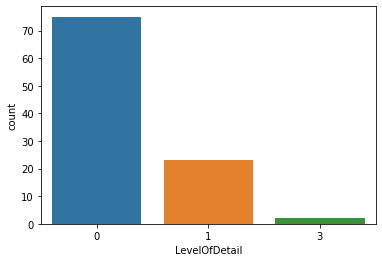

In [13]:
sns.countplot(x='LevelOfDetail', data=trial)
plt.show()

#### 3. Standardisation

In [14]:
from sklearn import preprocessing

# apply standardisation to explanatory variables
# Build scaler on the train set
std_scaler = preprocessing.StandardScaler().fit(X_train)

# Standardise the train set
X_train_std = std_scaler.transform(X_train)

# Standardise the test set
X_test_std = std_scaler.transform(X_test)

#### 4. Decision Tree

Accuracy: 0.60


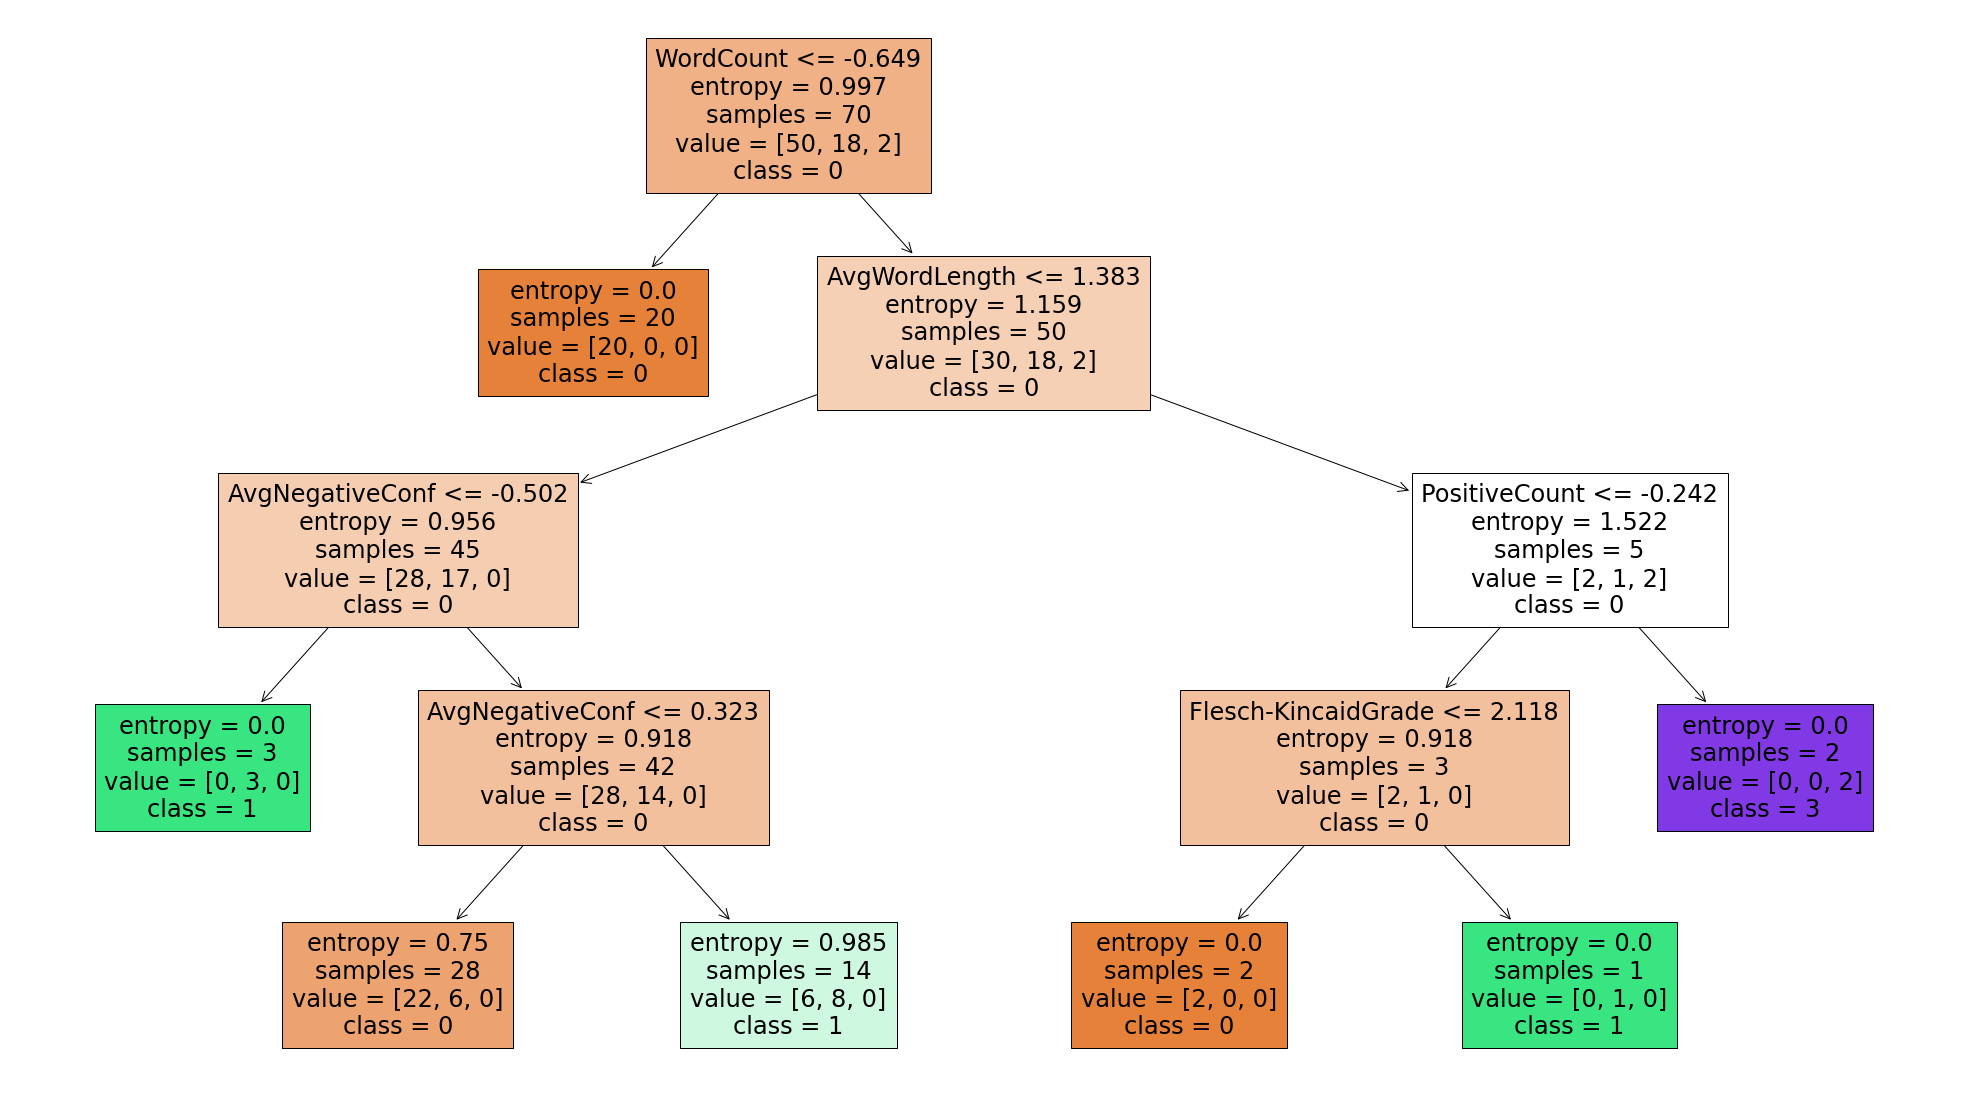

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(35,20))


t = tree.plot_tree(clf, feature_names=('DataBreachSource_Encoded', 'Channel_Encoded', 'Sector_Encoded',
       'VaderSentiment_Encoded', 'PositiveCount', 'NegativeCount',
       'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf',
       'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade',
       'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',
       'FAQKeywordCount', 'AvgWordLength', 'AvgSentenceLength'
       ),
                   class_names=['0', '1', '3'],
                   filled=True)

#### 5. Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.87


### Modelling trial for second label "BenefitParty"

In [20]:
# Copy certain columns to create a new DataFrame
selected_columns = [
    'DataBreachSource_Encoded', 'Channel_Encoded', 'Sector_Encoded', 'VaderSentiment_Encoded',
    'PositiveCount', 'NegativeCount', 'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf', 
                                              'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade', 'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',  'FAQKeywordCount', 
                                             'AvgWordLength', 'AvgSentenceLength', 'BenefitParty']  
# Test modelling for class "LevelDetail"
trial2 = df[selected_columns].copy()

In [21]:
trial2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DataBreachSource_Encoded  100 non-null    float64
 1   Channel_Encoded           100 non-null    float64
 2   Sector_Encoded            100 non-null    float64
 3   VaderSentiment_Encoded    100 non-null    float64
 4   PositiveCount             100 non-null    int64  
 5   NegativeCount             100 non-null    int64  
 6   PosNegRatio               100 non-null    float64
 7   PosTotalRatio             100 non-null    float64
 8   AvgPositiveConf           100 non-null    float64
 9   AvgNegativeConf           100 non-null    float64
 10  WordCount                 100 non-null    int64  
 11  SentenceCount             100 non-null    int64  
 12  ReadingEase               100 non-null    float64
 13  Flesch-KincaidGrade       100 non-null    float64
 14  HyperlinksC

In [22]:
trial2.head()

,DataBreachSource_Encoded,Channel_Encoded,Sector_Encoded,VaderSentiment_Encoded,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength,BenefitParty
0,0.75,0.79,0.24,0.77,7,3,2.333333,0.700000,0.980128,0.972266,...,9,39.06,13.7,0,1,0,2,5.240566,21.200000,2
1,0.75,0.79,0.24,0.19,23,24,0.958333,0.489362,0.987493,0.995686,...,47,61.67,9.1,0,4,0,0,4.885478,19.250000,1
2,0.75,0.79,0.13,0.77,21,7,3.000000,0.750000,0.989652,0.995580,...,29,45.46,11.2,0,5,0,1,5.143141,16.833333,2
3,0.75,0.79,0.13,0.77,7,9,0.777778,0.437500,0.997064,0.996481,...,18,38.86,13.8,1,11,4,0,5.392523,20.619048,2
4,0.18,0.79,0.09,0.77,14,5,2.800000,0.736842,0.993265,0.971655,...,22,46.98,10.6,0,0,1,0,5.308357,14.708333,1


In [24]:
# Convert the class label from int to string
trial2['BenefitParty'] = trial2['BenefitParty'].astype(str)

#### 2. Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import datasets, preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [25]:
X = trial2.drop(columns='BenefitParty')
y = trial2['BenefitParty'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70, 20), (70,), (30, 20), (30,))

In [26]:
X.head()

,DataBreachSource_Encoded,Channel_Encoded,Sector_Encoded,VaderSentiment_Encoded,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
0,0.75,0.79,0.24,0.77,7,3,2.333333,0.700000,0.980128,0.972266,212,9,39.06,13.7,0,1,0,2,5.240566,21.200000
1,0.75,0.79,0.24,0.19,23,24,0.958333,0.489362,0.987493,0.995686,847,47,61.67,9.1,0,4,0,0,4.885478,19.250000
2,0.75,0.79,0.13,0.77,21,7,3.000000,0.750000,0.989652,0.995580,503,29,45.46,11.2,0,5,0,1,5.143141,16.833333
3,0.75,0.79,0.13,0.77,7,9,0.777778,0.437500,0.997064,0.996481,428,18,38.86,13.8,1,11,4,0,5.392523,20.619048
4,0.18,0.79,0.09,0.77,14,5,2.800000,0.736842,0.993265,0.971655,347,22,46.98,10.6,0,0,1,0,5.308357,14.708333


In [27]:
X.columns

Index(['DataBreachSource_Encoded', 'Channel_Encoded', 'Sector_Encoded',
       'VaderSentiment_Encoded', 'PositiveCount', 'NegativeCount',
       'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf',
       'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade',
       'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',
       'FAQKeywordCount', 'AvgWordLength', 'AvgSentenceLength'],
      dtype='object')

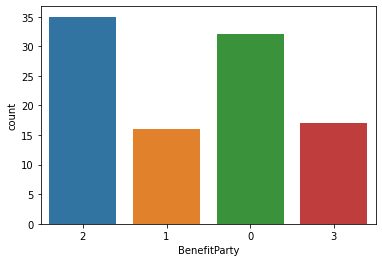

In [28]:
sns.countplot(x='BenefitParty', data=trial2)
plt.show()

#### 3. Standardisation

In [29]:
from sklearn import preprocessing

# apply standardisation to explanatory variables
# Build scaler on the train set
std_scaler = preprocessing.StandardScaler().fit(X_train)

# Standardise the train set
X_train_std = std_scaler.transform(X_train)

# Standardise the test set
X_test_std = std_scaler.transform(X_test)

#### 4. Decision Tree

Accuracy: 0.27


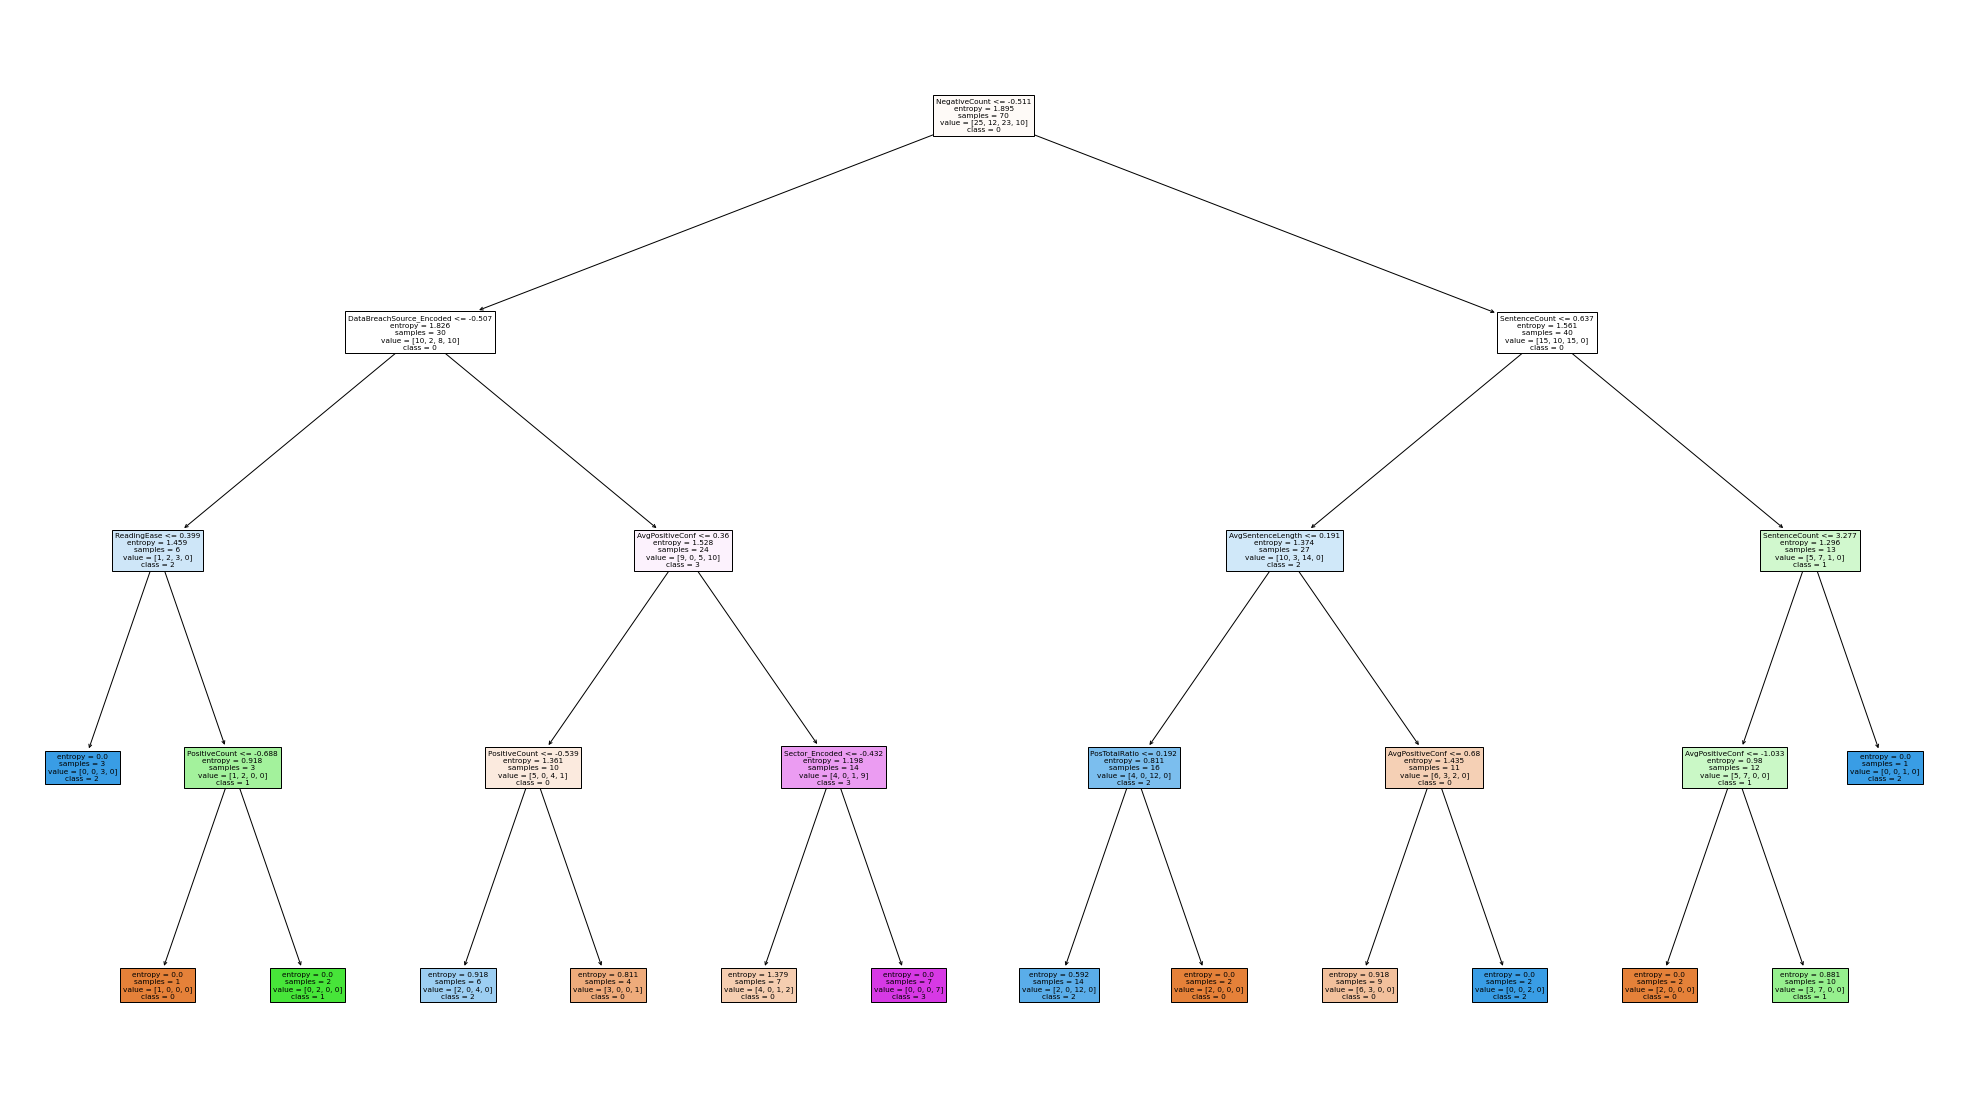

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(35,20))


t = tree.plot_tree(clf, feature_names=('DataBreachSource_Encoded', 'Channel_Encoded', 'Sector_Encoded',
       'VaderSentiment_Encoded', 'PositiveCount', 'NegativeCount',
       'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf',
       'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade',
       'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',
       'FAQKeywordCount', 'AvgWordLength', 'AvgSentenceLength'
       ),
                   class_names=['0', '1', '2', '3'],
                   filled=True)

#### 5. Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.30
